In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
#C:\Users\zhufei\.keras\datasets中加入老师给的文件夹，不然从国外源上加载很慢

In [5]:
train_image.shape   #60000张图片28*28

(60000, 28, 28)

In [6]:
train_label.shape 

(60000,)

In [7]:
test_image.shape ,test_label.shape  #10000张图片

((10000, 28, 28), (10000,))

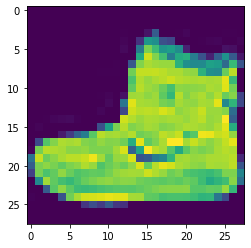

In [8]:
plt.imshow(train_image[0])

In [9]:
train_image[0]  #RGB取值范围

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
np.max(train_image[0]),np.min(train_image[0])

(255, 0)

In [11]:
train_label  #用顺序的数值来标志分类  如用9代表鞋子

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
train_image = train_image / 255   #归一化处理(0-1)
test_image = test_image / 255

In [42]:
#建立模型
model = tf.keras.Sequential()    #Dense是把一个一维数据映射到一个一维数据（中间可以有多维），28*28为二维数据，需要用flat扁平成一维的
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   #扁平成一个长度为28*28的向量
model.add(tf.keras.layers.Dense(128,activation="relu"))   #中间添加一层，输出128个隐含单元，不能太大，会过拟合
model.add(tf.keras.layers.Dense(10,activation="softmax")) #10个概率分布输出值，和为1

In [43]:
model.summary() #只有一个隐含层的可训练参数为101770

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
#编译模型
model.compile(optimiazer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics =["acc"]
)   #列表使用顺序（数字）编码，损失函数用sparse

In [15]:
#训练模型
model.fit(train_image,train_label,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 142us/sample - loss: 0.5095 - acc: 0.8206
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3798 - acc: 0.8629
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3472 - acc: 0.8761
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3302 - acc: 0.8836
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3167 - acc: 0.8890


In [16]:
#评价模型
model.evaluate(test_image,test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.393792996096611, 0.8658]

In [ ]:
#####独热编码

In [17]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)       #顺序编码转换成独热编码

In [18]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
train_label_onehot[0]  #第9个为1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [21]:
train_label_onehot[-1]     #最后一个数#第5个为1

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)   

In [23]:
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [25]:
#建立模型
model = tf.keras.Sequential()    #Dense是把一个一维数据映射到一个一维数据（中间可以有多维），28*28为二维数据，需要用flat扁平成一维的
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   #扁平成一个长度为28*28的向量
model.add(tf.keras.layers.Dense(128,activation="relu"))   #中间添加一层，输出128个隐含单元，不能太大，会过拟合
model.add(tf.keras.layers.Dense(10,activation="softmax")) #10个概率分布输出值，和为1

In [36]:
#编译模型
model.compile(optimiazer = tf.keras.optimizers.Adam(learning_rate=0.01),   #学习速率，优化器
              loss = "categorical_crossentropy",
              metrics =["acc"]
)   #列表使用独热编码，损失函数用categorical_crossentropy

In [37]:
#训练模型
model.fit(train_image,train_label_onehot,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3078 - acc: 0.8938
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2982 - acc: 0.8974
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2921 - acc: 0.8997
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2889 - acc: 0.9027
Epoch 5/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2802 - acc: 0.9057


In [29]:
#预测模型
predict = model.predict(test_image)

In [30]:
predict.shape   #预测集有10000个长度为10的向量

(10000, 10)

In [31]:
predict[0]  #第0张图片

array([1.0794462e-09, 7.3190281e-14, 3.3244857e-12, 8.6289344e-12,
       7.4790955e-12, 6.2468117e-03, 2.1004889e-09, 2.0641806e-03,
       2.1927731e-06, 9.9168676e-01], dtype=float32)

In [33]:
np.argmax(predict[0])

9

In [34]:
test_label[0] #说明预测正确

9

In [39]:
###重新建立模型，增加层（中间共3层）

In [40]:
#建立模型
model = tf.keras.Sequential()    #Dense是把一个一维数据映射到一个一维数据（中间可以有多维），28*28为二维数据，需要用flat扁平成一维的
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   #扁平成一个长度为28*28的向量
model.add(tf.keras.layers.Dense(128,activation="relu"))   #中间添加一层，输出128个隐含单元，不能太大，会过拟合
model.add(tf.keras.layers.Dense(128,activation="relu")) 
model.add(tf.keras.layers.Dense(128,activation="relu")) 
model.add(tf.keras.layers.Dense(10,activation="softmax")) #10个概率分布输出值，和为1

In [41]:
model.summary()  #3个隐含层可训练参数增加为134794

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [44]:
#编译模型
model.compile(optimiazer = tf.keras.optimizers.Adam(learning_rate=0.001),   #学习速率，优化器
              loss = "categorical_crossentropy",
              metrics =["acc"]
) 

In [45]:
#训练模型
model.fit(train_image,train_label_onehot,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5017 - acc: 0.8221
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3746 - acc: 0.8664
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3438 - acc: 0.8784
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3271 - acc: 0.8851
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3181 - acc: 0.8889
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3064 - acc: 0.8936
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2988 - acc: 0.8964
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2944 - acc: 0.8997
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2866 - acc: 0.9025
Epoch 10/10
60000/60000 [==============================] - 